In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

PREFERRED = "Preferred Semantics - Highest cardinality"
GROUNDED = "Grounded Semantics - Highest cardinality"
CATEGORISER = "Categoriser - Highest cardinality"

In [3]:
def int_to_float(df):
    for col in df.columns:
        # Check if the column type is int64
        if df[col].dtype == 'int64':
            # Convert to float64
            df[col] = df[col].astype('float64')

In [4]:
def round_values(df):
    def replace_values(x):

        if np.isnan(x):
            return x

        # If number is not integer, than it is undecided
        if isinstance(x, float) and not x.is_integer():
            return np.nan
        
        return x
    
    df[PREFERRED] = df[PREFERRED].apply(replace_values)
    df[GROUNDED] = df[GROUNDED].apply(replace_values)
    df[CATEGORISER] = df[CATEGORISER].apply(replace_values)

In [5]:
def performance_stats(df, results):

    target = "GroundTruth"

    for col in df.columns:
        if col in ["ID", target]:
            continue
        
        # Undecided cases do no enter in the statistics
        filtered_df = df.dropna(subset=[target, col])

        # Calculate Kappa score
        kappa = cohen_kappa_score(filtered_df[target], filtered_df[col])

        # Calculate percentage of NAs
        percent_na = 1 - len(filtered_df)/len(df)

        results["Kcohen"].append(kappa)
        results["Percent NA"].append(percent_na)
        
        # Display the metrics
        # print(f"\n{col}")
        # print(f"Precision: {precision}")
        # print(f"Recall: {recall}")
        # print(f"Youden's Index: {youden_index}")
        # print(f"Accuracy: {accuracy}")
        # print(f"Percent NA: {percent_na:.2f}")

In [6]:
def percent_nas(df):
    nan_count = df.isna().sum()

    # Calculate the total number of entries in each column
    total_count = len(df)

    # Calculate the percentage of NaN values in each column
    nan_percentage = (nan_count / total_count) * 100

    # Display the percentage of NaN values
    print("\nPercentage of NaN values in each column:")
    print(nan_percentage)

In [7]:
def unique_values(df, display = False):
    # Initialize a dictionary to store unique values for each column
    unique_values_dict = {}

    # Iterate through each column in the DataFrame
    for col in df.columns:
        if col == "ID":
            continue
        unique_values_dict[col] = df[col].unique()

    if not display:
        return
    
    # Display the unique values for each column
    for col, unique_values in unique_values_dict.items():
        print(f"Unique values in column '{col}': {unique_values}")

In [8]:
def rulex_results(dataset, conditions, error, index_rulex):

    results = {"Kcohen": [], "Percent NA": []}

    rulex_df = pd.read_csv("./rulex_performance.csv")
    rulex_df['Base'] = rulex_df['Base'].str.strip()
    rulex_df['Conditions'] = rulex_df['Conditions'].astype(str).str.strip()
    rulex_df['Error'] = rulex_df['Error'].astype(str).str.strip()

    for e in error:

        filtered_df = rulex_df[(rulex_df['Base'] == dataset) & (rulex_df['Conditions'] == conditions) & (rulex_df['Error'] == e)]
        #print(filtered_df)
        for index, row in filtered_df.iterrows():
            # # Repetition. Can be necessary to compare the same result with multiple others
            # for _ in range(4):
            results["Kcohen"].append(row['Kcohen'])
            results["Percent NA"].append(row['Nas'])

    results_df = pd.DataFrame(results, index=index_rulex)
    return results_df

In [9]:
def get_results_df(all_data, bases):
    results_dict = {"Kcohen":[], "Percent NA": []}

    for df in all_data:
        performance_stats(df, results_dict)

    budgets = ['25_budget', '50_budget', '90_budget', '100_budget']
    semantics = ['preferred', 'categoriser', 'grounded']
    row_names = []

    for budget in budgets:
        for base in bases:
            for semantic in semantics:
                row_names.append(budget + "_" + base + "_" + semantic)
    
    results_df = pd.DataFrame(results_dict, index=row_names)

    order = []
    for semantic in semantics:
        for base in bases:
            for budget in budgets:
                order.append(budget + "_" + base + "_" + semantic)
    
    return results_df.loc[order]

In [15]:
# base = 'myocardial'
# base = 'cars'
# base = 'genetic'
# base = 'cirrhosis'

base = 'personality'

# limited = "_limited"  # ""
# base += limited

# conditions = '4'
# conditions = 'unlimited'
# conditions = '4_score_conditions'

# root_folder = base.capitalize() + '_limited/results_framework/'
root_folder = base.capitalize() + '_limited/results_framework/'

budgets = ['25_budget', '50_budget', '90_budget', '100_budget']
#budgets = ['25_budget']

all_data = []

for budget in budgets:
    # for error in ["0050", "0100", "0150", "0200"]:
    # for error in ["0010", "0040", "0070", "0100"]:  # myocardial errors
    # for error in ["0010", "0020", "0030", "0040"]:  # myocardial limited errors
    for error in ["0050", "0100", "0150"]:  # personality limited errors
    #for error in ["10"]:
        # df = pd.read_csv(root_folder + budget + "/" + base + "_multiclass_error_" + error + "_" + budget.split("_")[0] + ".csv", na_values='NaN')
        # df = pd.read_csv(root_folder + budget + "/" + base + "_error_" + error + "_" + budget.split("_")[0] + ".csv", na_values='NaN') # myocardial limited errors
        df = pd.read_csv(root_folder + budget + "/" + base + "_error_" + error + "_" + budget.split("_")[0] + ".csv", na_values='NaN') # myocardial limited errors
        # print(root_folder + budget + "/" + base + "_score_base_" + error + "_rebuttal_" + budget.split("_")[0] + ".csv")
        # df.to_csv('output_teste_export_' + error + '.csv', index=True)
        int_to_float(df)
        round_values(df)
        unique_values(df)
        all_data.append(df)
        #df.to_csv('output_teste_' + error + '.csv', index=True)

# bases =  ['05_error', '10_error', '15_error', '20_error']
# bases =  ['01_error', '04_error', '07_error', '10_error'] # myocardial errors
# bases =  ['01_error', '02_error', '03_error', '04_error'] # myocardial limited errors
bases =  ['05_error', '10_error', '15_error'] # personality limited errors
results_df = get_results_df(all_data, bases)

print(results_df.shape)

# index_rulex = ["05_error_rulex", "10_error_rulex", "15_error_rulex", "20_error_rulex"] 
# index_rulex = ["01_error_rulex", "04_error_rulex", "07_error_rulex", "10_error_rulex"] # myocardial errors
# index_rulex = ["01_error_rulex", "02_error_rulex", "03_error_rulex", "04_error_rulex"] # myocardial limited errors
index_rulex = ["05_error_rulex", "10_error_rulex", "15_error_rulex"] # personality limited errors
results_df = pd.concat([results_df, rulex_results(base + "_limited", "unlimited", ["5", "10", "15"], index_rulex)])

index = {}
for semantic in ("preferred", "categoriser", "grounded"):
    count = 1
    for base in bases:
        for budget in budgets:
            index[f'{budget}_{base}_{semantic}'] = f"A{semantic[0].capitalize()}{count}"
            count += 1

for i, base in enumerate(bases):
    index[f'{base}_rulex'] = f'H{i + 1}'

# Print result for the overall results spreadsheet

for base in bases:

    # Save best results per error
    best_kcoken = 0
    best_percent_NA = 0
    best_semantic = ""
    best_ib = 0

    best_balanced = 0
    best_balanced_kcoken = 0
    best_balanced_percent_NA = 0
    best_balanced_semantic = ""
    best_balanced_ib = 0

    for budget in budgets:
        for semantic in ("preferred", "categoriser", "grounded"):
            print(f'{results_df.loc[f'{budget}_{base}_{semantic}'][0]:.2f}', end = " ")
            print(f'{results_df.loc[f'{budget}_{base}_{semantic}'][1]:.2f}', end = " ")

            if results_df.loc[f'{budget}_{base}_{semantic}'][0] > best_kcoken:
                best_kcoken = results_df.loc[f'{budget}_{base}_{semantic}'][0]
                best_percent_NA = results_df.loc[f'{budget}_{base}_{semantic}'][1]
                best_semantic = semantic
                best_ib = budget.split("_")[0]
            
            # Balanced result is kcohen + (1 - NAs)
            balanced = results_df.loc[f'{budget}_{base}_{semantic}'][0] + (1 - results_df.loc[f'{budget}_{base}_{semantic}'][1])
            if balanced > best_balanced:
                best_balanced = balanced
                best_balanced_kcoken = results_df.loc[f'{budget}_{base}_{semantic}'][0]
                best_balanced_percent_NA = results_df.loc[f'{budget}_{base}_{semantic}'][1]
                best_balanced_semantic = semantic
                best_balanced_ib = budget.split("_")[0]
    
    print("\n")
    print(f'{best_kcoken:.2f} {best_percent_NA:.2f} {best_semantic} {best_ib} {best_balanced_kcoken:.2f} {best_balanced_percent_NA:.2f} {best_balanced_semantic} {best_balanced_ib}')
    print("\n\n")

results_df.rename(index=index, inplace=True)
results_df.to_csv('output.csv', index=True)
results_df

c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:708: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:708: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:708: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:708: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

(36, 2)
-0.01 0.26 -0.01 0.26 nan 1.00 -0.00 0.13 -0.00 0.13 nan 1.00 0.01 0.24 -0.00 0.66 nan 1.00 0.00 0.25 -0.01 0.72 nan 1.00 

0.01 0.24 preferred 90 -0.00 0.13 preferred 50



-0.01 0.30 -0.01 0.28 nan 1.00 -0.01 0.01 -0.01 0.01 nan 1.00 0.01 0.05 -0.01 0.88 nan 1.00 0.00 0.06 -0.01 0.94 nan 1.00 

0.01 0.05 preferred 90 -0.01 0.01 preferred 50



0.03 0.17 0.03 0.15 nan 1.00 0.03 0.00 0.03 0.00 nan 1.00 -0.01 0.01 -0.02 0.98 nan 1.00 0.01 0.01 -0.02 0.99 nan 1.00 

0.03 0.17 preferred 25 0.03 0.00 preferred 50





,Kcohen,Percent NA
AP1,-0.010070,0.260825
AP2,-0.003123,0.125738
AP3,0.005087,0.237075
AP4,0.000985,0.249408
AP5,-0.013072,0.298093
AP6,-0.012017,0.009250
AP7,0.007422,0.053352
AP8,0.000834,0.063985
AP9,0.033707,0.173022
AP10,0.026957,0.000900


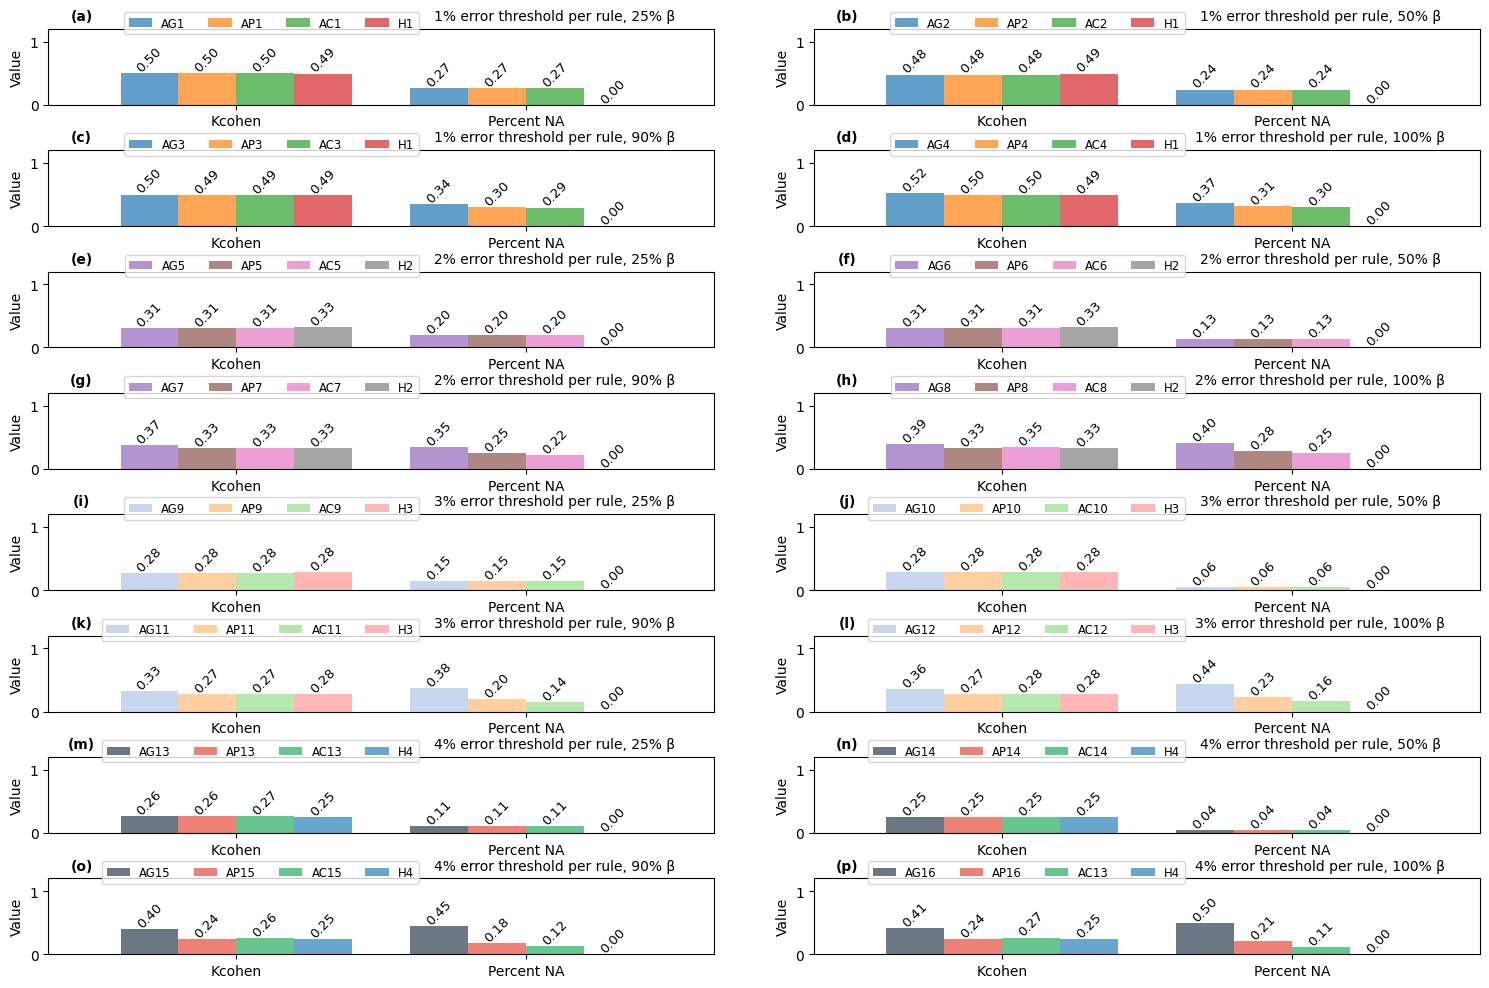

In [ ]:
df = results_df

# Define groups
groups = [
    (['AG1', 'AP1', 'AC1', 'H1']),
    (['AG2', 'AP2', 'AC2', 'H1']),
    (['AG3', 'AP3', 'AC3', 'H1']),
    (['AG4', 'AP4', 'AC4', 'H1']),
    (['AG5', 'AP5', 'AC5', 'H2']),
    (['AG6', 'AP6', 'AC6', 'H2']),
    (['AG7', 'AP7', 'AC7', 'H2']),
    (['AG8', 'AP8', 'AC8', 'H2']),
    (['AG9', 'AP9', 'AC9', 'H3']),
    (['AG10', 'AP10', 'AC10', 'H3']),
    (['AG11', 'AP11', 'AC11', 'H3']),
    (['AG12', 'AP12', 'AC12', 'H3']),
    (['AG13', 'AP13', 'AC13', 'H4']),
    (['AG14', 'AP14', 'AC14', 'H4']),
    (['AG15', 'AP15', 'AC15', 'H4']),
    (['AG16', 'AP16', 'AC13', 'H4'])
]

# Create a figure with 16 subplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Define colors for each group
colors_group1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
colors_group2 = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
colors_group3 = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896']
colors_group4 = ['#2c3e50', '#e74c3c', '#27ae60', '#2980b9']

inconsistency_budget = ["25%", "50%", "90%", "100%"] * 4
# error_threshold = ["5%"] * 4 + ["10%"] * 4 + ["15%"] * 4 + ["20%"] * 4
# error_threshold = ["1%"] * 4 + ["4%"] * 4 + ["7%"] * 4 + ["10%"] * 4
error_threshold = ["1%"] * 4 + ["2%"] * 4 + ["3%"] * 4 + ["4%"] * 4

label = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)", "(j)", "(k)", "(l)", "(m)", "(n)", "(o)", "(p)"]

# Plot each group
for i, group in enumerate(groups):
    group_df = df.loc[group]

    # Transpose the dataframe to have metrics as columns and indexes as rows
    group_df = group_df.T

    # Determine colors for the current group
    if i < 4 :
        colors = colors_group1 
    elif i < 8:
        colors = colors_group2
    elif i < 12:
        colors = colors_group3 
    else:
        colors = colors_group4

    # Plot the grouped bar plot
    ax = group_df.plot(kind='bar', ax=axes[i], width=0.8, alpha=0.7, color=colors)
    axes[i].set_ylabel('Value')
    axes[i].set_ylim(0, 1.2)
    axes[i].set_xticklabels(group_df.index, rotation=0, ha='center')

    # Annotate each bar with its height
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9.5, rotation=45)

    # Set legend for the current subplot (horizontal below the plot)
    handles, labels = ax.get_legend_handles_labels()
    axes[i].text(0.05, 1.17, label[i], transform=axes[i].transAxes, fontsize=10, ha='center', va='center', fontweight='bold')

    axes[i].legend(handles, labels, loc='upper right', bbox_to_anchor=(0.565, 1.3), ncol=len(labels), fontsize='small')
    # Add text below the legend
    axes[i].text(0.76, 1.17, error_threshold[i] + " error threshold per rule, " + inconsistency_budget[i] + " β", transform=axes[i].transAxes, fontsize=10, ha='center', va='center')

plt.tight_layout()

# Adjust vertical space between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.15)

# Adjust layout and save the plot
plt.savefig(base + '.png', dpi=300, bbox_inches='tight')
plt.show()
